In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict the amount of purchase

# Load the data

In [2]:
#input
df_original = pd.read_csv('black_friday_processed.csv')
df = df_original.copy()
print(df.columns)
df.head()

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [3]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Product_Category_3             int64
Purchase                       int64
dtype: object

# Feature Engineering 

In [4]:
# TODO: create a loop to transform the categorical columns to numerical
for col in ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']:
    df_dummies = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, df_dummies], axis=1)
    # Remove the original columns
    del df[col]
df.head()

,User_ID,Product_ID,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,...,Product_Category_3_9,Product_Category_3_10,Product_Category_3_11,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18
0,1000001,P00069042,8370,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000001,P00248942,15200,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1000001,P00087842,1422,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000001,P00085442,1057,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000002,P00285442,7969,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

User_ID                   int64
Product_ID               object
Purchase                  int64
Gender_F                  uint8
Gender_M                  uint8
Age_0-17                  uint8
Age_18-25                 uint8
Age_26-35                 uint8
Age_36-45                 uint8
Age_46-50                 uint8
Age_51-55                 uint8
Age_55+                   uint8
Occupation_0              uint8
Occupation_1              uint8
Occupation_2              uint8
Occupation_3              uint8
Occupation_4              uint8
Occupation_5              uint8
Occupation_6              uint8
Occupation_7              uint8
Occupation_8              uint8
Occupation_9              uint8
Occupation_10             uint8
Occupation_11             uint8
Occupation_12             uint8
Occupation_13             uint8
Occupation_14             uint8
Occupation_15             uint8
Occupation_16             uint8
Occupation_17             uint8
                          ...  
Product_

In [ ]:
# select the columns
X_columns = [x for x in df.columns if x != 'Purchase' and df.loc[:,x].dtype != object]
y_column = ['Purchase']
list(X_columns)

['User_ID',
 'Gender_F',
 'Gender_M',
 'Age_0-17',
 'Age_18-25',
 'Age_26-35',
 'Age_36-45',
 'Age_46-50',
 'Age_51-55',
 'Age_55+',
 'Occupation_0',
 'Occupation_1',
 'Occupation_2',
 'Occupation_3',
 'Occupation_4',
 'Occupation_5',
 'Occupation_6',
 'Occupation_7',
 'Occupation_8',
 'Occupation_9',
 'Occupation_10',
 'Occupation_11',
 'Occupation_12',
 'Occupation_13',
 'Occupation_14',
 'Occupation_15',
 'Occupation_16',
 'Occupation_17',
 'Occupation_18',
 'Occupation_19',
 'Occupation_20',
 'City_Category_A',
 'City_Category_B',
 'City_Category_C',
 'Stay_In_Current_City_Years_0',
 'Stay_In_Current_City_Years_1',
 'Stay_In_Current_City_Years_2',
 'Stay_In_Current_City_Years_3',
 'Stay_In_Current_City_Years_4+',
 'Marital_Status_0',
 'Marital_Status_1',
 'Product_Category_1_1',
 'Product_Category_1_2',
 'Product_Category_1_3',
 'Product_Category_1_4',
 'Product_Category_1_5',
 'Product_Category_1_6',
 'Product_Category_1_7',
 'Product_Category_1_8',
 'Product_Category_1_9',
 'Prod

# Model Training

In [ ]:
# split the data

df = df.sample(frac=1).reset_index(drop=True)

threshold = 0.8
absolute_threshold = int(len(df)*threshold)

X_train = df.iloc[:absolute_threshold][X_columns]
y_train = df.iloc[:absolute_threshold][y_column]

X_test = df.iloc[absolute_threshold:][X_columns]
y_test = df.iloc[absolute_threshold:][y_column]

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (430061, 93)
y_train (430061, 1)
X_test (107516, 93)
y_test (107516, 1)


In [ ]:
# TODO: split the data using sklearn train_test_split
threshold = 0.8
X = df[X_columns]
y = df[y_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (430061, 93)
y_train (430061, 1)
X_test (107516, 93)
y_test (107516, 1)


In [ ]:
# TODO: train a linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation

MAE 2276.17


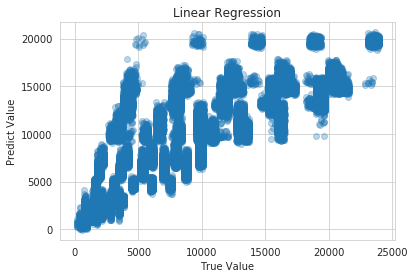

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print('MAE', round(mae, 2))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
# plt.xlim([0, 100])
# plt.ylim([0, 100])
plt.show()

In [ ]:
# TODO: calculate the RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

3001.0759994262203

# KNN

In [ ]:
# TODO: train a knn model
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

2786.4212777633093

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

2401.41099928456

# Experiments

Linear Regression
MAE 2276.16990717715
RMSE 3001.0759994262203


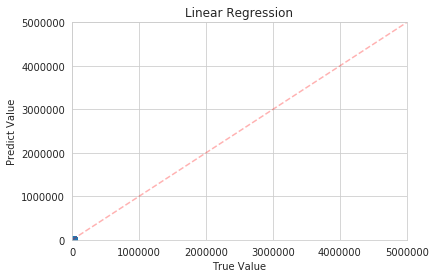


KNN 5
MAE 2718.920988504036
RMSE 3739.42213417774


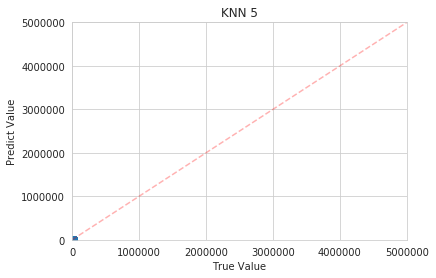


KNN 2
MAE 2791.8902814464823
RMSE 3920.5021541770557


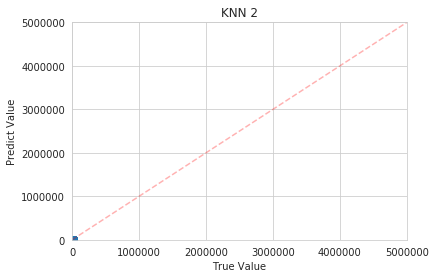


Decision Tree
MAE 2403.4121098058827
RMSE 3459.332914638487


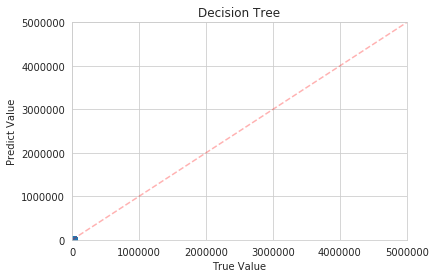

/home/dragon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Random Forest 10
MAE 2207.281385798221
RMSE 3042.926441219351


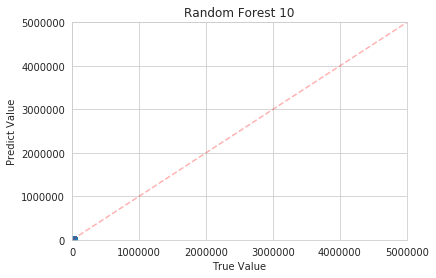

/home/dragon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
def model_training(model_name, model, X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
def model_prediction(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

def model_evaluation(model_name, y_test, y_pred):
    print(model_name)
    print('MAE', mean_absolute_error(y_test, y_pred))
    print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
    plt.title(model_name)
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([0, 5000000])
    plt.ylim([0, 5000000])
    plt.show()
    print('')

def run_experiment(model_name, model, X_train, y_train, X_test):
    train_model = model_training(model_name, model, X_train, y_train)
    predictions = model_prediction(train_model, X_test)
    model_evaluation(model_name, y_test, predictions)
    
run_experiment('Linear Regression', LinearRegression(), X_train, y_train, X_test)
run_experiment('KNN 5', KNeighborsRegressor(5), X_train, y_train, X_test)
run_experiment('KNN 2', KNeighborsRegressor(2), X_train, y_train, X_test)
run_experiment('Decision Tree', DecisionTreeRegressor(), X_train, y_train, X_test)
run_experiment('Random Forest 10', RandomForestRegressor(10), X_train, y_train, X_test)
run_experiment('Random Forest 100', RandomForestRegressor(100), X_train, y_train, X_test)


# Error Analysis

In [ ]:
model = RandomForestRegressor(100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

In [ ]:
#for i in range(len(X_test.columns)):
fi = []
for i, col in enumerate(X_test.columns):
    fi.append([col, model.feature_importances_[i]])
pd.DataFrame(fi).sort_values(1, ascending=False)

In [ ]:
df_test = pd.DataFrame(X_test).copy()
df_test['price'] = y_test
df_test['prediction'] = y_pred
df_test['abs_error'] = abs(df_test['price']-df_test['prediction'])
df_test.sort_values(by='abs_error', ascending=False).round()

In [ ]:
plt.hist(df_test['abs_error'], bins=30)
plt.show()

In [ ]:
df_error = df_test[df_test['abs_error']>500000]
df_error

In [ ]:
df_error.describe()

In [ ]:
df_error.corr()['abs_error'].dropna().sort_values()

In [ ]:
len(df_test[df_test[98004]==1])

In [ ]:
df[df['zipcode']==98004][['mean_income', 'median_income']]

In [ ]:
plt.hist(df[df['zipcode']==98004]['price'], bins=30)
plt.show()

# Cross Validation

In [ ]:
# models = [
#     ('LinearRegression', LinearRegression()),
#     ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
#     ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
#     ('KNeighborsRegressor', KNeighborsRegressor()),
#     ('DecisionTreeRegressor', DecisionTreeRegressor())
# ]

# k = 10
# results = {}
# for m in models:
#     print('MODEL', m[0])
#     results[m[0]] = {'mae':[], 'rmse':[]}
#     kf = KFold(n_splits=k)
#     for train_index, test_index in kf.split(X):
#         X_train_k, X_test_k = X.values[train_index], X.values[test_index]
#         y_train_k, y_test_k = y.values[train_index], y.values[test_index]
#         model = m[1]
#         model.fit(X_train_k, y_train_k.ravel())
#         y_pred = model.predict(X_test_k)
#         mae = mean_absolute_error(y_test_k, y_pred)
#         rmse = np.sqrt(mean_squared_error(y_test_k, y_pred))
#         results[m[0]]['mae'].append(mae)
#         results[m[0]]['rmse'].append(rmse)

In [ ]:
# for metric in ['mae', 'rmse']:
#     values = []
#     labels = []
#     for model, result_values in results.items():
#         for m, v in result_values.items():
#             if m == metric:
#                 labels.append(model)
#                 values.append(v)
#     plt.figure(figsize=(12,6))
#     plt.title(metric)
#     plt.boxplot(values)
#     plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
#     plt.show()